<a href="https://colab.research.google.com/github/JackEd339/MLEData/blob/main/ECS708P_miniproject_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLE data set coursework - EC708P

Jack Edmundson - 210010912 

# Basic solution

## Summary 

The dataset in use is one created by the student body conisisting of each participant reading out a set of numerals in different intonations multiple times. The data set consists of a total 20,000 audio files.

Both the basic and advanced solution follow the same sysematic approach:



*   Identify the quality metric 
*   Data preperation


*   Data visulisation 
*   Preprocessing

*   Model description and build 
*   Performance evaluation 


*   Error analysis
*   Conclusion and reflection 


## Data exploration and preprocessing


In this section of the notebook I explored the raw data set in order to frame the problem: 

*   Using pandas to organise the data and also encode the intonations into numerical values 
*   I used the librosa package to explore Audio features of the data set that research lead me to belive was meaningful 



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from google.colab import drive
import IPython.display as ipd
from tqdm import tqdm
import librosa
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, sys, re, pickle, glob
files = glob.glob('/content/drive/MyDrive/Data/MLEnd/training/*/*.wav')
print(files)

['/content/drive/MyDrive/Data/MLEnd/training/Training/0019140.wav', '/content/drive/MyDrive/Data/MLEnd/training/Training/0002206.wav', '/content/drive/MyDrive/Data/MLEnd/training/Training/0003118.wav', '/content/drive/MyDrive/Data/MLEnd/training/Training/0014464.wav', '/content/drive/MyDrive/Data/MLEnd/training/Training/0004677.wav', '/content/drive/MyDrive/Data/MLEnd/training/Training/0002212.wav', '/content/drive/MyDrive/Data/MLEnd/training/Training/0012001.wav', '/content/drive/MyDrive/Data/MLEnd/training/Training/0014470.wav', '/content/drive/MyDrive/Data/MLEnd/training/Training/0017179.wav', '/content/drive/MyDrive/Data/MLEnd/training/Training/0008059.wav', '/content/drive/MyDrive/Data/MLEnd/training/Training/0004663.wav', '/content/drive/MyDrive/Data/MLEnd/training/Training/0010616.wav', '/content/drive/MyDrive/Data/MLEnd/training/Training/0000405.wav', '/content/drive/MyDrive/Data/MLEnd/training/Training/0016267.wav', '/content/drive/MyDrive/Data/MLEnd/training/Training/0019154.

In [ ]:
n = 0

# five random files
for _ in range(5):
  n += 1
  display(ipd.Audio(files[n]))

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/trainingMLEnd.csv')
labels

,File ID,digit_label,participant,intonation
0,0000000.wav,4,S73,question
1,0000001.wav,2,S88,excited
2,0000002.wav,70,S5,neutral
3,0000003.wav,2,S85,bored
4,0000004.wav,4,S30,excited
...,...,...,...,...
19995,0019995.wav,90,S163,excited
19996,0019996.wav,10,S99,question
19997,0019997.wav,90,S46,question
19998,0019998.wav,19,S13,neutral


In [ ]:
labels

,File ID,digit_label,participant,intonation
0,0000000.wav,4,S73,question
1,0000001.wav,2,S88,excited
2,0000002.wav,70,S5,neutral
3,0000003.wav,2,S85,bored
4,0000004.wav,4,S30,excited
...,...,...,...,...
19995,0019995.wav,90,S163,excited
19996,0019996.wav,10,S99,question
19997,0019997.wav,90,S46,question
19998,0019998.wav,19,S13,neutral


In [ ]:
audio_file_path=('/content/drive/MyDrive/Data/MLEnd/training/Training/0019140.wav')
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [ ]:
print(librosa_audio_data)

[ 0.0000000e+00 -6.1035156e-05 -3.0517578e-05 ... -1.8310547e-04
 -1.8310547e-04 -1.2207031e-04]


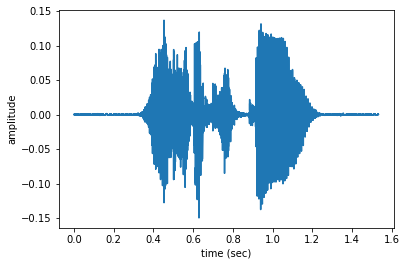

In [ ]:
n = 1
fs = None # Sampling frequency. If None, fs would be 22050
x, fs = librosa.load(files[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

In [ ]:
print(files[n])

/content/drive/MyDrive/Data/MLEnd/training/Training/0002206.wav


In [ ]:

x, sample_rate = librosa.load(files[n],sr=fs)
mfccs = librosa.feature.mfcc( y = x, sr = sample_rate, n_mfcc = 100)
mfccs_sf = np.nanmean(mfccs.T, axis =0)
mfccs_var = np.var(mfccs_sf)

spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=fs)[0]
spectral_rolloff_var = np.var(spectral_rolloff)

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
Xdb_mean = np.nanmean(Xdb)
spectral_centroids = librosa.feature.spectral_centroid(x, sr=fs)[0]
spectral_centroids_var = np.var(spectral_centroids)

### Data preprocessing 

This section includes both:

1.   data organisation
2.   data transformation 





Must encode the intonations into numerical so that it can be implemented correctly into the model. This was done using sklearn label encoder 

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
lbl_encoder.fit_transform(labels['intonation'])
labels['intonation_label'] = lbl_encoder.fit_transform(labels['intonation'])


In [ ]:
labels

,File ID,digit_label,participant,intonation,intonation_label
0,0000000.wav,4,S73,question,3
1,0000001.wav,2,S88,excited,1
2,0000002.wav,70,S5,neutral,2
3,0000003.wav,2,S85,bored,0
4,0000004.wav,4,S30,excited,1
...,...,...,...,...,...
19995,0019995.wav,90,S163,excited,1
19996,0019996.wav,10,S99,question,3
19997,0019997.wav,90,S46,question,3
19998,0019998.wav,19,S13,neutral,2


As you can see from the dataframe above: 



*   00 = bored
*   01 = excited
*   02 = neutral
*   03 = question

The reason for the encoding is due to the algorithm being compliant with numerical data, using the intonation directly will cause issues 






Distribution of dataset - a quick superricial view of the distribution to aid in framing the solution 

In [ ]:
labels['intonation_label'].value_counts()

## Feature selection/ engineering

The raw data alone wasn't very useful to help build a model that would satisfy the accuracy metric. Various other features that were explored in the data exploration section were added to the provided function and appended to the array. The aim was to obtain as many significant features as possible at this stage. 

In [ ]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag



In [ ]:
def getXy(files,labels_file,scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    yi =  yi = list(labels_file[labels_file['File ID']==fileID]['intonation_label'])[0]
    if onlySingleDigit and yi>9:
      continue
    else:
      fs = None # if None, fs would be 22050
      x, fs = librosa.load(file,sr=fs)
      if scale_audio: x = x/np.max(np.abs(x))
      f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
      power = np.sum(x**2)/len(x)
      pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
      pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
      voiced_fr = np.mean(voiced_flag)
     
# variance of mfccs
    
      mfccs = librosa.feature.mfcc( y = x, sr = fs, n_mfcc = 100)
      mfccs_sf = np.nanmean(mfccs.T, axis =0)
      mfccs_var = np.mean(mfccs_sf)
# variance of spectral roll off 
      spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=fs)[0]
      spectral_rolloff_var = np.mean(spectral_rolloff)

# variance of spectral centroids
      spectral_centroids = librosa.feature.spectral_centroid(x, sr=fs)[0]
      spectral_centroids_var = np.mean(spectral_centroids)

      xi = [power,pitch_mean,pitch_std,voiced_fr,mfccs_var,spectral_rolloff_var,spectral_centroids_var]
      X.append(xi)
      y.append(yi)
  return np.array(X),np.array(y)
  

In [ ]:
X,y = getXy(files[:5000],labels_file=labels,scale_audio=True, onlySingleDigit=True)

# If you want to use all 20000 files, run next line instead
#X,y = getXy(files,labels_file=labels,scale_audio=True, onlySingleDigit=True)

Streaming output truncated to the last 5000 lines.

 50%|█████     | 2501/5000 [12:59<14:13,  2.93it/s]

 50%|█████     | 2502/5000 [13:00<14:16,  2.92it/s]

 50%|█████     | 2503/5000 [13:00<13:20,  3.12it/s]

 50%|█████     | 2504/5000 [13:00<13:19,  3.12it/s]

 50%|█████     | 2505/5000 [13:00<12:37,  3.29it/s]

 50%|█████     | 2506/5000 [13:01<14:15,  2.92it/s]

 50%|█████     | 2507/5000 [13:01<13:13,  3.14it/s]

 50%|█████     | 2508/5000 [13:01<12:56,  3.21it/s]

 50%|█████     | 2509/5000 [13:02<13:18,  3.12it/s]

 50%|█████     | 2510/5000 [13:02<13:04,  3.18it/s]

 50%|█████     | 2511/5000 [13:02<13:02,  3.18it/s]

 50%|█████     | 2512/5000 [13:03<14:03,  2.95it/s]

 50%|█████     | 2513/5000 [13:03<13:31,  3.07it/s]

 50%|█████     | 2514/5000 [13:03<13:09,  3.15it/s]

 50%|█████     | 2515/5000 [13:04<12:38,  3.27it/s]

 50%|█████     | 2516/5000 [13:04<11:18,  3.66it/s]

 50%|█████     | 2517/5000 [13:04<11:04,  3.74it/s]

 50%|█████     | 2518/5000 [13:04<11:14,  3.68i

In [ ]:
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', y)


The shape of X is (5000, 7)
The shape of y is (5000,)
The labels vector is [1 2 1 ... 0 2 3]


## Feature selection (additional preprocessing)

Following obtaining the array I applied PCA a data reduction technique in order to achieve the most significant features out of those i extracted in the early stage. These features were then put into a dataframe so that i could run a correlation matrix to get a superficial view of the data before i visualised it. 


In [ ]:
# Import required libraries 
from sklearn.decomposition import PCA
from sklearn import decomposition
#Reduce to 3 dimensions 
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)



# If nan sample, remove them
if np.sum(np.isnan(X)):
  idx = np.isnan(X).sum(1)>0
  X = X[~idx]
  y = y[~idx]
print(np.sum(np.isnan(X)))

0


In [ ]:
df = pd.DataFrame(data=X)
inton_column = labels["intonation_label"]
digit_column = labels["digit_label"]
df1 = pd.concat([df,digit_column], axis=1)
dfa = pd.concat([df1,inton_column], axis=1)
df2 = dfa.head()
df2.corr()

,0,1,2,digit_label,intonation_label
0,1.000000,0.838072,-0.406989,-0.563113,0.181531
1,0.838072,1.000000,0.093002,-0.510086,0.224037
2,-0.406989,0.093002,1.000000,0.062942,0.314321
digit_label,-0.563113,-0.510086,0.062942,1.000000,0.315952
intonation_label,0.181531,0.224037,0.314321,0.315952,1.000000


It is evident that there is quite alot of overlap and a linear classifier would not be sufficient. Performing a quick Kmeans clustering algorithm on the dataset helps visualise this.

## Model selection 


In this section the first round of models were trained on the training data set. First round reffering to that save time arbitiary parameters were applied and the ones that performed with the better and more consistent accuracy would be optimised.

The data was split into training and validation along with the features being normalised 

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
# Split data
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

mean = X_train.mean(0)
sd =  X_train.std(0)

X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd
X_train.shape


(3500, 3)

In [ ]:


# created function for simplicity 
def get_accuracy(model, X_train, y_train,X_val,y_val,ytp,yvp):
  model.fit(X_train,y_train)
  ytp = model.predict(X_train)
  yvp = model.predict(X_val)
  print(classification_report(y_train,ytp))
  print(confusion_matrix(y_train,ytp))
  plot_confusion_matrix(model,X_train,y_train, display_labels=labels["intonation"], normalize='true')
  print('Training Accuracy', np.mean(ytp==y_train))
  print('Validation  Accuracy', np.mean(yvp==y_val))
  return 

Support vector machine 

In [ ]:
svmc  = svm.SVC(C=7)

svmc.fit(X_train,y_train)
ytp = svmc.predict(X_train)
yvp = svmc.predict(X_val)

cross_val_score(svmc, X_train, y_train, cv=3)



# The below output will be the models training accuracy

array([0.42159383, 0.40188518, 0.40566038])

Random forect classifier that makes use of decision trees 

In [ ]:

rfc = RandomForestClassifier(n_estimators = 10)
rfc.fit(X_train,y_train)
pred_train_rfc = rfc.predict(X_train)
pred_val_rfc = rfc.predict(X_val)

cross_val_score(rfc, X_train, y_train, cv=3)


# The below output will be the models training accuracy

array([0.40531277, 0.40702656, 0.39794168])

K nearest neighbour 

In [ ]:

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)
pred_train_knn = rfc.predict(X_train)
pred_val_knn = rfc.predict(X_val)

cross_val_score(knn, X_train, y_train, cv=3)

# The below output will be the models training accuracy

array([0.3933162 , 0.39417309, 0.38336192])

A multi layer perceptron classifier

In [ ]:

mlpc = MLPClassifier(hidden_layer_sizes= (10), activation='relu', solver='adam', max_iter= 10)
mlpc.fit(X_train,y_train)

pred_train_mlpc = mlpc.predict(X_train)
pred_val_mlpc = mlpc.predict(X_val)


cross_val_score(mlpc, X_train, y_train, cv=3)


# The below output will be the models training accuracy


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0.29905741, 0.3050557 , 0.34562607])

## Performance evaluation 


In this section I will select the two best performing models in the inital round and attempt to optimise them. The validation data will also be used on these models 

In [ ]:
  def cm (model):
    plot_confusion_matrix(model,X_val,y_val, display_labels=labels["intonation"], normalize='true')
    return 

SVM clf None


array([0.424, 0.406, 0.402])

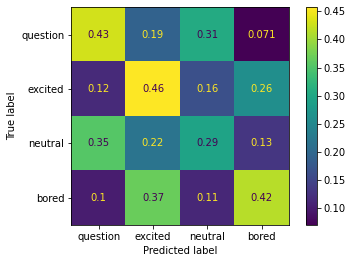

In [ ]:
print("SVM clf",cm(svmc))
cross_val_score(svmc, X_val,y_val,cv=3)



Random forest clf None


array([0.38 , 0.388, 0.41 ])

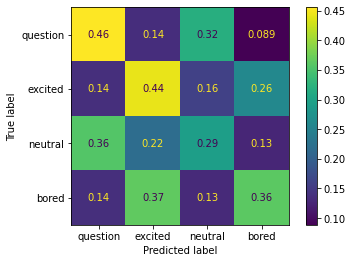

In [ ]:
print("Random forest clf", cm(rfc))
cross_val_score(rfc, X_val,y_val,cv=3)

KNN clf None


array([0.408, 0.372, 0.352])

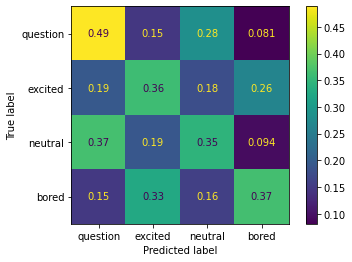

In [ ]:
print("KNN clf", cm(knn))
cross_val_score(knn, X_val,y_val,cv=3)

## Optimisation 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(X_train,y_train)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,rbf,0.400857
1,1,rbf,0.394857


In [ ]:
svmc  = svm.SVC(C=10, kernel='linear')

svmc.fit(X_train,y_train)
ytp = svmc.predict(X_train)
yvp = svmc.predict(X_val)

cross_val_score(svmc, X_val, y_val, cv=10)

array([0.42 , 0.386, 0.408])

Comparing these to the SVM under the performance evaluation section it is clear that this has helped optimise it

In [ ]:
 
               'min_samples_leaf': min_samples_leaf}

In [ ]:

# First create the base model to tune
rf = RandomForestClassifier(random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, n_jobs = -1, random_state=42)
rf_random.fit(X, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:

# Input the parameters from the optimisation into the new version of the model and compare the validation accuracy 
rfc = RandomForestClassifier(n_estimators = 100, max_leaf_nodes=16, n_jobs=-1, min_samples_split=2, criterion='gini')
rfc.fit(X_train,y_train)
pred_train_rfc = rfc.predict(X_train)
pred_val_rfc = rfc.predict(X_val)

cross_val_score(rfc, X_val, y_val, cv=5)

array([0.422, 0.406, 0.386])

## Error analysis


The issues that had to be overcome were that the models were unable to account for the variation of different accents within the dataset. This caused complications. After analysing the waveforms of randomly picked audio files it would appear that there is a correlation between the majority of the audio features and the accents. With the abcense of the " accent/location" based data it is difficult to improve the classifier above its currrent accuracy.

## Causal explanation/Conclusion 

The audio features suggest that there seems to more of a correlation between the enviornments in which the participant is recording in and their accent rather than the intonation that they reading the script in. Thus making it difficult to classify the intonation of the audio file. 

# Advanced solution 

The process to the advanced solution is very similar to the one that i took with basic solution. 


*   Building a model to predict the participant that took part in the MLE data set ( voice recognition ) 

My approach on this part of the coursework was utlising Keras sequential deep learning module. Rather than extracting various features for examination before passing them into the model, I let the model decide. 

Research shows that MFCC contains essentially a pattern of the audio files. Thus if i obtained a large enough array of the coefficients then it would be somewhat similar to the relationship between an image and array of pixels. Deep learning being prevalent in this field lead me to this approach. 

Subsequently the large amount of features that were being used did not work well with standard ML approach - this will be seen under "Model selection" 

**In this section I changed the " validation data " to " Test" just to allow me to distinguish between the two notebooks 
**bold text****

## Loading data set 

In [ ]:
import os, sys, re, pickle, glob
files = glob.glob('/content/drive/MyDrive/Data/MLEnd/training/*/*.wav')
len(files)

20000

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/trainingMLEnd.csv')


In [ ]:
labels

,File ID,digit_label,participant,intonation
0,0000000.wav,4,S73,question
1,0000001.wav,2,S88,excited
2,0000002.wav,70,S5,neutral
3,0000003.wav,2,S85,bored
4,0000004.wav,4,S30,excited
...,...,...,...,...
19995,0019995.wav,90,S163,excited
19996,0019996.wav,10,S99,question
19997,0019997.wav,90,S46,question
19998,0019998.wav,19,S13,neutral


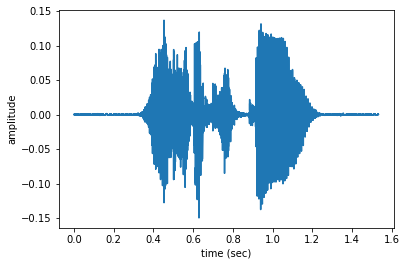

In [ ]:
n=	1
fs = None # Sampling frequency. If None, fs would be 22050
x, fs = librosa.load(files[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

In [ ]:

x, sample_rate = librosa.load(files[n],sr=fs)
mfccs = librosa.feature.mfcc( y = x, sr = sample_rate, n_mfcc = 100)
mfccs_sf = np.nanmean(mfccs.T, axis =0)
mfccs_var = np.var(mfccs_sf)

spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=fs)[0]
spectral_rolloff_var = np.var(spectral_rolloff)

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
Xdb_mean = np.nanmean(Xdb)
spectral_centroids = librosa.feature.spectral_centroid(x, sr=fs)[0]
spectral_centroids_var = np.var(spectral_centroids)

## Data preprocessing 

This section includes both:

1.   data organisation
2.   data transformation 





Must encode the intonations into numerical so that it can be implemented correctly into the model. This was done using sklearn label encoder 

In [ ]:
# encode labels
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
lbl_encoder.fit_transform(labels['participant'])
labels['participant'] = lbl_encoder.fit_transform(labels['participant'])

labels

,File ID,digit_label,participant,intonation
0,0000000.wav,4,155,question
1,0000001.wav,2,171,excited
2,0000002.wav,70,129,neutral
3,0000003.wav,2,168,bored
4,0000004.wav,4,108,excited
...,...,...,...,...
19995,0019995.wav,90,71,excited
19996,0019996.wav,10,183,question
19997,0019997.wav,90,125,question
19998,0019998.wav,19,34,neutral


As you can see from the dataframe above: 



*   00 = bored
*   01 = excited
*   02 = neutral
*   03 = question

The reason for the encoding is due to the algorithm being compliant with numerical data, using the intonation directly will cause issues 






## Extraction of full Mel-frequency cepstral coefficients



Here I created a function to obtain all of the coefficients for the files that I passed through it. Using a loop i iterated through the the files. Make sure to transpose the value before appending it to the list 

In [ ]:

def get_mf(files):
  mfcc_list = []
  n = 0
  for _ in tqdm (files):
    
    filesID, sample_rate = librosa.load(files[n],sr=fs)
    n += 1
    mfccs = librosa.feature.mfcc( y = filesID, sr = sample_rate, n_mfcc = 150)
    mfccs_scaled_features = np.mean(mfccs.T,axis=0)
    mfcc_list.append(mfccs_scaled_features)
  
    mfcc = (mfcc_list)
  return mfcc

In [ ]:
mfcc = get_mf(files[:20000])  # Select how many files you want to iterate through 

Streaming output truncated to the last 5000 lines.

 19%|█▊        | 3728/20000 [00:34<02:29, 108.61it/s]


 19%|█▊        | 3740/20000 [00:34<02:26, 110.69it/s]


 19%|█▉        | 3752/20000 [00:34<02:29, 108.68it/s]


 19%|█▉        | 3763/20000 [00:34<02:29, 108.61it/s]


 19%|█▉        | 3774/20000 [00:34<02:30, 107.60it/s]


 19%|█▉        | 3785/20000 [00:34<02:30, 107.95it/s]


 19%|█▉        | 3796/20000 [00:34<02:30, 107.37it/s]


 19%|█▉        | 3808/20000 [00:34<02:27, 109.43it/s]


 19%|█▉        | 3819/20000 [00:34<02:28, 109.02it/s]


 19%|█▉        | 3830/20000 [00:35<02:31, 106.59it/s]


 19%|█▉        | 3841/20000 [00:35<02:32, 105.65it/s]


 19%|█▉        | 3853/20000 [00:35<02:28, 108.80it/s]


 19%|█▉        | 3864/20000 [00:35<02:28, 109.03it/s]


 19%|█▉        | 3875/20000 [00:35<02:28, 108.36it/s]


 19%|█▉        | 3887/20000 [00:35<02:27, 109.10it/s]


 19%|█▉        | 3898/20000 [00:35<02:42, 99.22it/s] 


 20%|█▉        | 3910/20000 [00:35<02:36, 102.65it/s

I modified the function provided in order to obtain the Y component in a numpy arrary 

In [ ]:
def getXy(files,labels_file,scale_audio=False, onlySingleDigit=False):
  Y =[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    yi = list(labels_file[labels_file['File ID']==fileID]['participant'])[0]
    if onlySingleDigit and yi>9:
      continue
    else:
   
    
      Y.append(yi)
  return (Y)

In [ ]:
Y = getXy(files[:20000],labels_file=labels,scale_audio=True, onlySingleDigit=False)




  0%|          | 0/20000 [00:00<?, ?it/s]


  0%|          | 39/20000 [00:00<00:51, 385.56it/s]


  0%|          | 96/20000 [00:00<00:46, 426.23it/s]


  1%|          | 152/20000 [00:00<00:43, 456.97it/s]


  1%|          | 210/20000 [00:00<00:40, 486.23it/s]


  1%|▏         | 269/20000 [00:00<00:38, 511.57it/s]


  2%|▏         | 323/20000 [00:00<00:38, 515.84it/s]


  2%|▏         | 379/20000 [00:00<00:37, 525.87it/s]


  2%|▏         | 435/20000 [00:00<00:36, 535.11it/s]


  2%|▏         | 492/20000 [00:00<00:35, 542.43it/s]


  3%|▎         | 546/20000 [00:01<00:37, 516.21it/s]


  3%|▎         | 600/20000 [00:01<00:37, 521.13it/s]


  3%|▎         | 656/20000 [00:01<00:36, 530.87it/s]


  4%|▎         | 710/20000 [00:01<00:36, 532.72it/s]


  4%|▍         | 768/20000 [00:01<00:35, 543.86it/s]


  4%|▍         | 824/20000 [00:01<00:35, 547.27it/s]


  4%|▍         | 879/20000 [00:01<00:36, 525.86it/s]


  5%|▍         | 938/20000 [00:01<00:35, 541.42it/s]


  5%|▍         | 993

Quick inspection of one of the succesful extractions 

In [ ]:
print(mfcc[1]) 
import librosa.display

[-4.9099634e+02  3.5974884e+01  2.7189964e+01  4.0786316e+01
  2.0935606e+01  1.6282351e+01 -1.3152042e+01  1.1194878e+01
 -3.7181394e+00  8.8038540e+00 -1.8780133e+00  3.7418276e-01
 -3.2144463e+00  3.5616989e+00 -5.5446887e-01 -3.1793041e+00
 -4.4104209e+00  3.8376284e+00  6.2055314e-01  2.4028664e+00
  2.0719163e+00  3.0843916e+00 -5.7627134e+00  4.0992326e-01
 -2.4874668e+00 -1.5218077e+00  1.6982723e+00 -3.2432408e+00
 -7.1947675e+00  2.3285248e+00 -4.9259796e+00  2.6591222e+00
  7.1091855e-01 -5.0764024e-01 -2.1816907e+00  1.9447992e+00
 -2.3889308e+00  7.2341764e-01 -2.4262016e+00  1.6959823e+00
 -1.6189377e+00 -1.6077414e+00 -1.5590833e+00 -2.2336292e+00
 -2.9299958e+00 -1.3155874e+00 -1.8049482e+00 -3.0152719e+00
 -2.5765762e+00 -8.2729745e-01 -2.6152525e+00 -4.7332478e+00
 -2.7758875e+00 -2.1981163e+00 -5.3913099e-01 -1.5390475e+00
  7.1951896e-01  8.7372345e-01  1.3550627e+00  1.6747340e+00
  1.7300773e+00  1.1465271e+00  8.7541318e-01  4.6265860e+00
  1.1191862e+00  3.85720

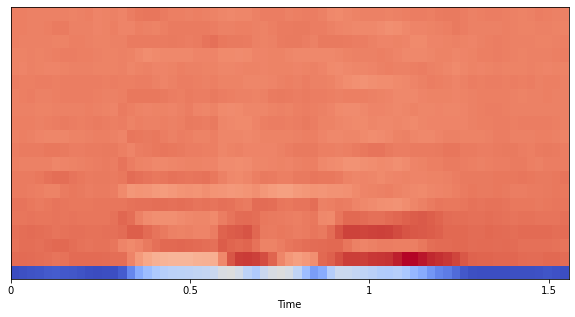

In [ ]:
# The mfcc essentially shows a unique pattern for the audio files 
import librosa.display
plt.figure(figsize=(10,5))
mfccs = librosa.feature.mfcc(x, sr=fs)
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

Loaded into a dataframe just to double check the data 

In [ ]:

dataX = pd.DataFrame(mfcc)
dataX

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,-389.658569,42.350597,13.071388,12.579728,10.039087,-12.673253,-11.893054,1.226080,-9.936617,-17.198090,-16.231016,-3.337809,-15.977662,-7.970009,-4.039242,-4.111667,-7.876421,-3.382043,-8.983290,-0.268776,-6.581902,-6.666693,-4.460733,-3.222220,-3.829267,-3.710488,-1.060883,2.195055,2.955750,3.054682,2.272040,1.290784,-2.475456,0.171385,0.241044,3.419337,0.870359,1.943110,0.615220,4.712212,...,0.721667,0.282697,-0.516143,-0.064825,-0.383684,-0.193663,-0.003107,-0.973724,-0.546959,-0.683009,-0.561508,-0.785845,-0.835942,0.283925,0.126061,0.541003,0.597372,0.515296,0.403322,0.830131,0.208498,0.078415,0.589689,-0.240721,0.015660,0.345741,-1.068603,0.642361,0.572906,-0.250370,0.356579,-0.238991,-0.068959,0.331789,-0.183954,-0.121398,0.011530,-0.522647,-0.922184,-0.025427
1,-490.996338,35.974884,27.189964,40.786316,20.935606,16.282351,-13.152042,11.194878,-3.718139,8.803854,-1.878013,0.374183,-3.214446,3.561699,-0.554469,-3.179304,-4.410421,3.837628,0.620553,2.402866,2.071916,3.084392,-5.762713,0.409923,-2.487467,-1.521808,1.698272,-3.243241,-7.194767,2.328525,-4.925980,2.659122,0.710919,-0.507640,-2.181691,1.944799,-2.388931,0.723418,-2.426202,1.695982,...,-0.743625,0.512183,-0.516178,-0.176717,-1.152922,-0.501005,-0.065840,0.391375,0.291197,0.496517,-0.029396,-0.086463,-0.242033,-0.281524,0.636989,0.176999,0.249981,0.121273,-0.490177,-0.097300,-0.090795,-0.947980,-0.443948,-0.550917,-0.632182,-0.176560,0.461820,0.172272,0.063473,0.250528,0.037780,-0.235543,-0.146827,-0.857240,-0.026524,-0.195054,-0.100694,0.437055,-0.614677,-0.187044
2,-438.946259,54.257938,8.490097,25.235998,-12.161136,-1.420178,-14.305544,13.049169,-9.021239,-3.427941,-3.462380,-7.634316,4.274346,-3.844576,3.754147,-6.315588,-0.066017,-1.175297,-2.386489,-7.544646,-3.602619,-5.351974,-7.775948,-0.165328,-8.651893,-2.062497,-4.293007,0.948157,0.075469,2.859971,3.652483,-2.642103,1.492544,-2.064232,1.645724,-1.217420,0.479907,-2.423987,-1.744410,-1.130656,...,0.150342,-0.020279,0.059695,-0.564695,0.521804,-0.530599,-0.231636,-0.174106,-0.064625,-0.680515,-0.414061,-0.261913,-0.446688,0.861661,0.254060,0.436723,-0.052515,0.438491,-0.133483,0.335522,0.023984,-0.157077,0.534677,-0.093011,0.657304,-0.549780,-0.000299,0.152180,0.099027,-0.078150,-0.113318,-0.223481,-0.370983,0.153719,-0.263477,0.187914,-0.524557,0.026891,-0.093259,0.108005
3,-547.284363,108.734352,-5.297725,-0.142583,-5.834773,4.983848,8.344918,-6.403057,1.465182,-8.063941,-10.831067,-11.486856,-9.093961,-1.372317,-7.579842,-1.881180,-8.064496,-5.688643,-3.341406,-10.154617,-6.491858,-2.630344,-5.164638,-7.101731,-5.110511,-1.295369,-3.338914,-1.703333,-5.850961,-5.024587,-6.537184,-2.616405,-1.676616,4.889986,9.567156,10.535437,6.704208,4.238386,3.464334,0.810084,...,-0.727877,0.233768,0.115481,-0.232589,-1.803443,-1.380098,-0.849292,-1.595143,-1.288972,-0.242366,-0.647151,-1.122502,0.001154,0.675179,-0.039765,-0.719129,-0.329696,-0.538969,0.400083,-0.049493,-1.151857,-0.472839,0.665780,0.107578,-1.502234,-0.182752,0.041372,0.683658,0.068965,-1.070887,-0.258432,0.700363,0.408342,-0.028798,1.086699,0.601432,-0.338362,-1.540659,-0.100382,0.634357
4,-365.725861,34.590366,-11.048840,14.486561,3.838132,-18.568012,-21.822241,-11.802673,-17.589231,1.974133,-10.208039,-5.102379,3.650653,-19.059467,-3.024751,-7.712046,-19.773401,10.709699,-13.204926,1.622326,-4.875333,3.198471,-5.737783,1.911036,-3.489527,-0.662755,-4.143905,-4.736559,-6.727676,-3.510828,-3.594634,-5.810903,-5.337262,-3.043954,-2.798467,5.142734,2.438805,9.281660,5.569507,3.992736,...,-0.887300,0.221884,-0.545047,-0.453562,-0.976683,0.662879,-0.334597,0.083006,-0.148268,-0.251077,-0.771296,-0.699322,-0.152242,-0.027276,0.168845,0.224997,-0.373630,-0.331602,-1.113158,-0.683653,-0.44

This piece of code was needed in order to get the numpyarray. Added visualisation was used for trouble shooting.

In [ ]:
dataY = pd.DataFrame(Y, columns=['participant'])
dataY
part = dataY["participant"]
dataXY = pd.concat([dataX,part], axis=1)
#dataXY


Y=np.array(dataXY['participant'].tolist())
X = np.array(mfcc)

In [ ]:
dataXY.head().corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,participant
0,1.000000,-0.757517,-0.169026,0.061050,0.115425,-0.840367,-0.840664,-0.199218,-0.961634,-0.144757,-0.345031,0.363553,0.187243,-0.807329,0.274343,-0.820733,-0.478079,0.550697,-0.782129,0.577982,-0.221520,-0.024309,0.001459,0.628704,0.085100,-0.239589,-0.220964,0.076560,0.393850,0.272885,0.555599,-0.268881,-0.525754,-0.794046,-0.725570,-0.424348,-0.323054,0.295600,0.228675,0.602856,...,-0.222194,-0.617502,-0.218823,0.524337,0.918028,0.598725,0.386755,0.410666,-0.434057,-0.364515,0.111548,-0.548540,-0.249083,-0.021281,0.790521,0.210361,0.397399,-0.455273,0.023007,0.603362,0.792242,0.077238,-0.083079,0.573699,-0.121447,-0.800826,-0.488875,0.331093,0.478913,0.877270,-0.642093,-0.766030,0.534056,-0.546089,-0.565795,0.649753,0.512060,0.008243,-0.126765,-0.201954
1,-0.757517,1.000000,-0.401353,-0.671522,-0.565225,0.291286,0.944116,-0.256388,0.732642,-0.342071,-0.168716,-0.846291,-0.280835,0.337399,-0.545602,0.608809,0.177861,-0.685574,0.289011,-0.870307,-0.452840,-0.306348,0.109064,-0.871170,-0.327418,0.161173,-0.344414,0.111313,-0.131650,-0.588976,-0.382618,-0.203745,0.109585,0.879842,0.989134,0.702295,0.831880,-0.001353,0.264021,-0.444542,...,-0.234270,0.813467,0.064207,-0.459898,-0.824643,-0.892937,-0.813725,-0.864699,-0.133493,-0.300448,-0.654012,0.474428,0.641609,-0.632273,-0.873269,-0.442439,-0.545601,0.613837,0.033638,-0.804122,-0.204088,0.550780,0.683561,-0.569599,0.080507,0.304155,0.635711,-0.166403,-0.918281,-0.773076,0.913810,0.847701,0.122006,0.777769,0.928071,-0.547406,-0.903525,0.250110,0.610418,0.610754
2,-0.169026,-0.401353,1.000000,0.779374,0.602315,0.613640,-0.139305,0.835784,0.300490,0.204244,0.431843,0.719709,-0.229577,0.701484,0.436273,0.360890,0.670561,-0.166009,0.651430,0.358601,0.713770,-0.056539,-0.039256,0.170384,0.187372,-0.473964,0.850172,0.299698,0.206598,0.824826,0.219653,0.925078,0.694956,-0.095330,-0.344751,-0.581991,-0.812344,-0.714625,-0.910119,-0.108157,...,0.502342,-0.282428,0.438455,0.244246,-0.181091,0.687746,0.377402,0.548298,0.398934,0.921801,0.710307,-0.446078,-0.336422,0.787411,0.417011,0.782799,0.671034,0.180690,0.490078,0.641873,-0.609553,-0.595634,-0.886121,0.337394,0.483884,0.425869,0.134047,0.323083,0.626302,0.020184,-0.603806,-0.096492,-0.623684,-0.646425,-0.655535,-0.304247,0.445428,-0.777084,-0.953108,-0.421590
3,0.061050,-0.671522,0.779374,1.000000,0.521809,0.482434,-0.553756,0.748783,-0.086808,0.691842,0.772307,0.780451,0.394352,0.392002,0.739606,-0.144837,0.403378,0.399828,0.495219,0.539391,0.931256,0.384136,-0.429001,0.694293,0.138537,0.025318,0.608593,-0.156267,-0.141504,0.674358,0.138773,0.511169,0.563154,-0.558504,-0.678902,-0.763674,-0.932329,-0.481924,-0.751537,-0.203823,...,0.365032,-0.381773,-0.084849,0.334152,0.214066,0.694577,0.859044,0.921416,0.547438,0.870229,0.976049,-0.136836,-0.506895,0.979220,0.527095,0.371531,0.489710,-0.435082,-0.034481,0.616096,-0.515622,-0.836794,-0.867841,0.421475,-0.135738,0.488679,-0.505532,-0.183566,0.904758,0.089284,-0.738953,-0.562819,-0.697694,-0.680002,-0.716767,-0.055833,0.860659,-0.275941,-0.794580,-0.496453
4,0.115425,-0.565225,0.602315,0.521809,1.000000,0.233351,-0.299206,0.098765,-0.036092,0.326942,0.023499,0.885514,-0.320893,0.163235,-0.121501,0.230705,-0.168388,0.353723,0.043020,0.848356,0.570614,0.490997,0.535100,0.291858,0.885106,-0.131151,0.890024,-0.291404,-0.239742,0.303224,-0.295696,0.664322,-0.101068,-0.138513,-0.586122,-0.081821,-0.599266,0.126144,-0.229262,0.590826,...,0.926487,-0.841140,0.668241,-0.323794,0.291135,0.575755,0.419080,0.453652,0.670865,0.520225,0.335690,-0.176873,-0.915311,0.650539,0.256294,0.565466,0.147063,-0.241001,-0.042625,0.350269,-0.390401,-0.766714,-0.844245,-0.182704,0.431160,0.006225,-0.075363,0.226346,0.536569,0.524818,-0.413759,

## Model selection 

The rfc classifier had to be run here before I encoded the Y labels for the deep learning model 

In [ ]:
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X,Y,test_size=0.1)

mean2 = X2_train.mean(0)
sd2 =  X2_train.std(0)

X2_train = (X2_train-mean)/sd2
X2_test  = (X2_test-mean)/sd2

#Here i attempted to use rfc on my dataset 

rfc = RandomForestClassifier(n_estimators = 210, max_leaf_nodes=16, n_jobs=-1)
rfc.fit(X_train2,Y_train2)
pred_train_rfc = rfc.predict(X_train2)
pred_val_rfc = rfc.predict(X_test2)

cross_val_score(rfc, X_test2, Y_test2, cv=3)

array([0.381, 0.368, 0.345])

In [ ]:
Y

array([ 79,   5, 183, ..., 132, 129,  51])

In [ ]:
Y.shape

(20000,)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
#The labels for the deep learning model have to be in the form of 0 and 1s thus some additional encoding had to be done 
labelencoder=LabelEncoder()
Y = to_categorical(labelencoder.fit_transform(Y))




In [ ]:
Y.shape

(20000, 184)

In [ ]:
X.shape

(20000, 128)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

mean = X_train.mean(0)
sd =  X_train.std(0)

X_train = (X_train-mean)/sd
X_test  = (X_test-mean)/sd

The labels in this instance the participants are encoded in the deep learning model allowing them to be proceced by the perceptrons 

It was clear from this point that the ML model I was using before would not fit well with the approach that I had taken with this solution. 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model=Sequential()
###first layer
model.add(Dense(100,input_shape=(128,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')



In [ ]:
num_labels=Y.shape[1]

In [ ]:

from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 200


start = datetime.now()

model.fit(X_train, Y_train, batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
90/90 [==============================] - 1s 5ms/step - loss: 5.3057 - accuracy: 0.0071
Epoch 2/100
90/90 [==============================] - 0s 5ms/step - loss: 5.1093 - accuracy: 0.0173
Epoch 3/100
90/90 [==============================] - 0s 5ms/step - loss: 4.8613 - accuracy: 0.0371
Epoch 4/100
90/90 [==============================] - 0s 5ms/step - loss: 4.5359 - accuracy: 0.0655
Epoch 5/100
90/90 [==============================] - 0s 5ms/step - loss: 4.2269 - accuracy: 0.0962
Epoch 6/100
90/90 [==============================] - 0s 5ms/step - loss: 3.9948 - accuracy: 0.1233
Epoch 7/100
90/90 [==============================] - 0s 5ms/step - loss: 3.7071 - accuracy: 0.1616
Epoch 8/100
90/90 [==============================] - 0s 5ms/step - loss: 3.5414 - accuracy: 0.1874
Epoch 9/100
90/90 [==============================] - 0s 5ms/step - loss: 3.3973 - accuracy: 0.2077
Epoch 10/100
90/90 [==============================] - 0s 5ms/step - loss: 3.3019 - accuracy: 0.2136
Epoch 11/

## Performance evaluation  

In [ ]:
test_accuracy=model.evaluate(X_train,Y_train,verbose=0)
print(test_accuracy[1])

0.7793333530426025


In [ ]:

test_accuracy=model.evaluate(X_test,Y_test,verbose=0)
print(test_accuracy[1])

0.7294999957084656


In [ ]:
history.history

{'accuracy': [0.007755102124065161,
  0.015510204248130322,
  0.029387755319476128,
  0.044285714626312256,
  0.06306122243404388,
  0.08938775211572647,
  0.10326530784368515,
  0.11979591846466064,
  0.1361224502325058,
  0.1563265323638916,
  0.16367347538471222,
  0.1863265335559845,
  0.19183672964572906,
  0.2126530557870865,
  0.22591836750507355,
  0.23428571224212646,
  0.23795917630195618,
  0.2314285784959793,
  0.25897958874702454,
  0.26326531171798706,
  0.28224489092826843,
  0.28224489092826843,
  0.27571427822113037,
  0.30000001192092896,
  0.28857141733169556,
  0.29102039337158203,
  0.30102041363716125,
  0.30204081535339355,
  0.31918367743492126,
  0.32428571581840515,
  0.322857141494751,
  0.33408161997795105,
  0.33979591727256775,
  0.3312245011329651,
  0.3471428453922272,
  0.3461224436759949,
  0.3534694015979767,
  0.35265305638313293,
  0.35795918107032776,
  0.3577550947666168,
  0.3648979663848877,
  0.37142857909202576,
  0.37510204315185547,
  0.3769

In [ ]:

n = 1000
filesID, sample_rate = librosa.load(files[n],sr=fs)


librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
mfccs = librosa.feature.mfcc( y = filesID, sr = sample_rate, n_mfcc = 128)
mfccs_scaled_features_test = np.mean(mfccs.T,axis=0)

print(mfccs_scaled_features_test)
mfccs_scaled_features_test=mfccs_scaled_features_test.reshape(1,-1)
print(predicted_label)

[-5.2673834e+02  6.4920448e+01  3.7193981e+01  4.3930195e+01
  1.5530684e+01  6.5920510e+00 -4.5703211e+00 -2.7505130e-01
 -1.9844755e+01  2.4135220e+00 -1.0474495e+01  2.5251505e+00
 -7.7008233e+00 -1.6853149e+00 -4.7295632e+00 -5.4585910e+00
 -4.1735544e+00 -1.0634089e+01 -3.0718107e+00 -6.2481017e+00
 -8.1078291e+00 -8.6157835e-01 -6.2364721e+00 -4.0996065e+00
 -4.7486444e+00 -4.3054714e+00 -5.3967118e+00 -4.1168814e+00
 -5.4049497e+00 -5.8589988e+00 -3.9720674e+00 -4.1109004e+00
 -5.4926233e+00 -3.7638223e+00 -5.8459978e+00 -2.1040437e+00
 -3.7677484e+00  5.4860550e-01 -1.6287868e+00  1.8550690e+00
  1.4985194e+00  2.7094920e+00  1.4961864e+00  2.3733060e+00
  1.1466123e+00  3.4484437e+00  5.5213273e-01  1.9181863e+00
 -5.6759369e-01 -2.4619034e-01 -1.1792824e+00  5.9840268e-01
 -9.5851713e-01 -2.3666189e+00 -2.7029452e+00 -8.9500451e-01
 -1.5559663e+00  6.7199039e-01 -2.6465788e+00 -3.7678435e-02
  1.3671254e-01 -2.3704022e-01  1.0011251e+00  3.7382009e+00
  1.6090429e+00  2.24752

## Conclusion for the Advanced solution



Taking on board my analysis of the Basic solution and my causal explanation of the accuracy ( that audio features had a stronger relationship with the person recording than the intonation ). I decided to develop this model that would distingush between different participants. 

I was quiet overly ambitious attemping a deep learning approach as I was unware of the complexity and the time it takes them to run their models however that being said it does show a very good output for the validation accuracy, above that of standard ML models. 

If I was to have more time to do this project I would have done more reserch into singal processing as I believe the key to making the best classifier for this dataset lies within the domain knowlede of audio files. 
